In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data_Preprocessing/edit_nnz.csv")

In [3]:
mask = df['Cconst'] == 0
zero_rows = df[mask]
len(zero_rows)

144

In [4]:
df = df[~mask]

Код выше вычисляет количество нулей, и удаляет их

In [5]:
lg_columns = [col for col in df.columns if 'lg' in col]

# Выводим DataFrame, ограничиваясь только выбранными столбцами
result_df = df[lg_columns]
result_df

,lgCmin,lgCmax,lgCconst,lgCcat,lgvolume
0,0.176091,0.176091,2.000000,-4.581699,1.838352
1,0.176091,0.176091,2.000000,-4.581699,3.419637
2,-0.301030,1.397940,2.000000,-4.581699,1.838352
3,-0.301030,1.397940,2.000000,-4.581699,3.419637
4,-0.698970,2.000000,1.176091,-4.581699,4.167498
...,...,...,...,...,...
808,-2.000000,-0.221849,3.301030,-1.384164,1.555542
809,-2.000000,-0.221849,3.301030,-1.384164,2.312556
810,-2.000000,-0.221849,3.301030,-1.384164,3.341830
831,-2.000000,-0.301030,1.000000,-1.522879,6.438384


In [6]:
columns_of_interest = ['Cmin', 'Cmax','Cconst','Ccat']

# Проверьте выбранные столбцы на наличие 0
zero_columns = (df[columns_of_interest] == 0).any()

# Выведите количество строк с 0 в выбранных столбцах
count_zero_rows = len(df[df[columns_of_interest].any(axis=1) & (df[columns_of_interest] == 0).any(axis=1)])

count_zero_rows


6

In [7]:
zero_columns

Cmin       True
Cmax      False
Cconst    False
Ccat      False
dtype: bool

In [8]:
df = df[~(df[columns_of_interest].any(axis=1) & (df[columns_of_interest] == 0).any(axis=1))]

In [9]:
columns_to_drop = ['Cmin', 'Cmax','Ccat','id','Vmax']
df = df.drop(columns=columns_to_drop)

In [10]:
df

,Km,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
0,0.0065,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,0.176091,...,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.138713
1,0.0554,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,0.176091,...,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,-0.577903
2,0.0355,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.301030,...,37.30,6.500000,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,0.922362
3,0.2277,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.301030,...,37.30,6.500000,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0,-0.358328
4,0.0173,1,2.7570,1.0710,-0.0500,4.0,37.0,3,7.0,-0.698970,...,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0,0.011655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,0.2700,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,127.53,59.557802,5.992739,6.000000,-0.398299,0.037337,-2.133673,191.458847,0.0,-3.200659
809,0.6400,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,127.53,59.557802,5.992739,6.000000,-0.398299,0.037337,-2.133673,191.458847,0.0,-2.886057
810,0.3400,1,2.2654,1.2468,1.1250,4.0,28.6,3,7.0,-2.000000,...,127.53,59.557803,5.992739,6.000000,-0.398299,0.037337,-2.133673,191.458847,0.0,-3.142668
831,0.0160,1,2.7010,1.2100,0.4540,4.0,50.0,3,7.0,-2.000000,...,63.37,-1.036531,5.992739,6.000000,-0.398299,0.037337,-1.556408,0.999968,0.0,-4.725842


In [11]:
df.to_csv('edit_nnz_1.csv', index=False)

In [12]:
df = pd.read_csv("../Data_Preprocessing/edit_nnz_1.csv")

In [13]:
df.describe()

,Km,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,1.575142,1.013062,2.536609,1.210457,0.235998,4.432612,33.700581,2.683599,5.923948,-1.481741,...,59.334731,16.472109,6.130217,6.026046,-0.351785,-0.063315,-0.904544,149.498794,78.480406,-3.842720
std,3.091012,0.147076,0.272273,0.177881,0.530908,1.124191,9.408692,0.659264,1.666468,1.184587,...,128.589916,37.335627,1.201793,0.980478,0.103144,0.151789,1.013976,937.961687,439.832906,1.304476
min,0.000200,1.000000,1.830000,0.700000,-1.358000,2.000000,20.000000,1.000000,0.000000,-4.000000,...,0.000000,-21.400000,0.000000,0.000000,-0.744035,-0.254557,-2.508322,0.000000,0.000000,-7.468521
25%,0.109000,1.000000,2.280000,1.088000,-0.084400,4.000000,25.000000,3.000000,5.600000,-2.301030,...,0.000000,0.000000,5.992739,5.992739,-0.398299,-0.254557,-2.048433,0.000000,0.000000,-4.531653
50%,0.308000,1.000000,2.582000,1.224000,0.026500,4.000000,34.000000,3.000000,7.000000,-1.301030,...,12.530000,0.000000,5.992739,6.000000,-0.398299,0.037337,0.000000,0.373245,0.000000,-4.008774
75%,1.140000,1.000000,2.750000,1.320000,0.501200,4.500000,40.000000,3.000000,7.000000,-0.698970,...,63.320000,6.500000,6.000000,6.000000,-0.254557,0.037337,0.000000,1.000032,0.000000,-3.459545
max,16.540000,3.000000,3.170000,1.710000,1.690000,9.000000,90.000000,3.000000,7.000000,2.000000,...,1109.380000,153.000000,11.503714,11.503714,0.000000,0.322471,0.000000,11696.537820,4830.000000,4.777318


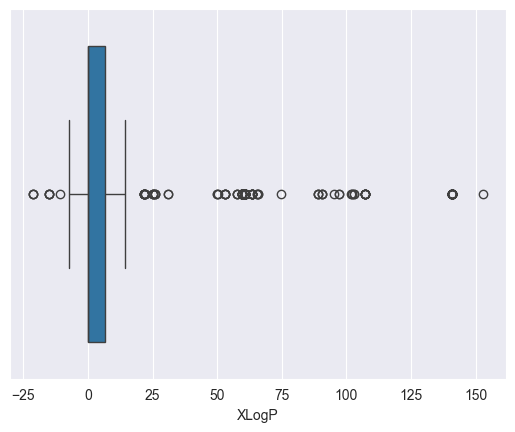

In [14]:
sns.boxplot(x=df['XLogP'])
plt.show()

<Axes: >

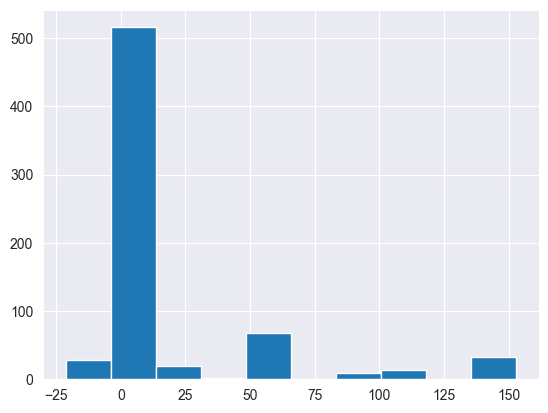

In [15]:

df['XLogP'].hist()

In [16]:
df['Cconst'] = df['Cconst'].replace(0, np.nan) 

In [17]:
df['Cconst'].value_counts()  

Cconst
1.000       44
100.000     42
0.100       42
10.000      36
0.800       29
            ..
0.140        1
142.828      1
1045.000     1
1.270        1
0.350        1
Name: count, Length: 109, dtype: int64

In [18]:
df_nan = df.isna().mean().sort_values(ascending = False)                 

In [19]:
df_nan

Km                    0.0
activity              0.0
MinEStateIndex        0.0
EState_VSA6           0.0
VSA_EState4           0.0
PEOE_VSA8             0.0
MinPartialCharge      0.0
EState_VSA4           0.0
SMR_VSA7              0.0
Complexity1           0.0
TPSA1                 0.0
TPSA2                 0.0
TPSA                  0.0
XLogP                 0.0
MaxEStateIndex.1      0.0
MaxEStateIndex.2      0.0
MinPartialCharge.1    0.0
MaxPartialCharge.1    0.0
BCUT2D_CHGLO          0.0
polym                 0.0
Complexity            0.0
MinAbsEStateIndex     0.0
BalabanJ              0.0
Kappa2                0.0
lgCmax                0.0
X                     0.0
IR                    0.0
pot2                  0.0
ph                    0.0
temp                  0.0
dstr                  0.0
cryst                 0.0
lgCmin                0.0
lgCconst              0.0
VSA_EState8           0.0
Cconst                0.0
lgCcat                0.0
lgvolume              0.0
Mcoat       

In [20]:
df['Cconst']. median ()    

4.0

In [21]:
df['Cconst'] = df['Cconst'].replace(np.nan, 3.5)

In [22]:
df.describe()

,Km,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,1.575142,1.013062,2.536609,1.210457,0.235998,4.432612,33.700581,2.683599,5.923948,-1.481741,...,59.334731,16.472109,6.130217,6.026046,-0.351785,-0.063315,-0.904544,149.498794,78.480406,-3.842720
std,3.091012,0.147076,0.272273,0.177881,0.530908,1.124191,9.408692,0.659264,1.666468,1.184587,...,128.589916,37.335627,1.201793,0.980478,0.103144,0.151789,1.013976,937.961687,439.832906,1.304476
min,0.000200,1.000000,1.830000,0.700000,-1.358000,2.000000,20.000000,1.000000,0.000000,-4.000000,...,0.000000,-21.400000,0.000000,0.000000,-0.744035,-0.254557,-2.508322,0.000000,0.000000,-7.468521
25%,0.109000,1.000000,2.280000,1.088000,-0.084400,4.000000,25.000000,3.000000,5.600000,-2.301030,...,0.000000,0.000000,5.992739,5.992739,-0.398299,-0.254557,-2.048433,0.000000,0.000000,-4.531653
50%,0.308000,1.000000,2.582000,1.224000,0.026500,4.000000,34.000000,3.000000,7.000000,-1.301030,...,12.530000,0.000000,5.992739,6.000000,-0.398299,0.037337,0.000000,0.373245,0.000000,-4.008774
75%,1.140000,1.000000,2.750000,1.320000,0.501200,4.500000,40.000000,3.000000,7.000000,-0.698970,...,63.320000,6.500000,6.000000,6.000000,-0.254557,0.037337,0.000000,1.000032,0.000000,-3.459545
max,16.540000,3.000000,3.170000,1.710000,1.690000,9.000000,90.000000,3.000000,7.000000,2.000000,...,1109.380000,153.000000,11.503714,11.503714,0.000000,0.322471,0.000000,11696.537820,4830.000000,4.777318


<Axes: >

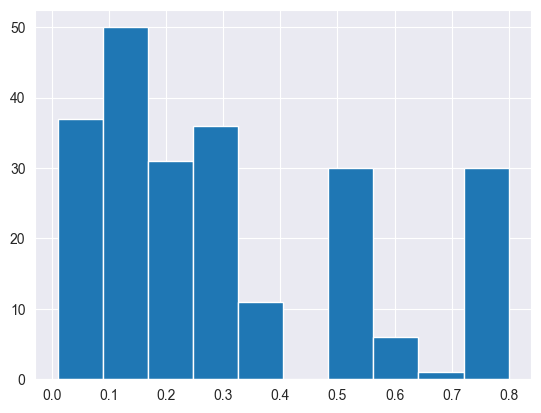

In [23]:
q1 = df['Cconst'].quantile(0)
q2 = df['Cconst'].quantile(0.3)
df[df['Cconst'].between(q1,q2)]['Cconst'].hist()

<Figure size 640x480 with 0 Axes>

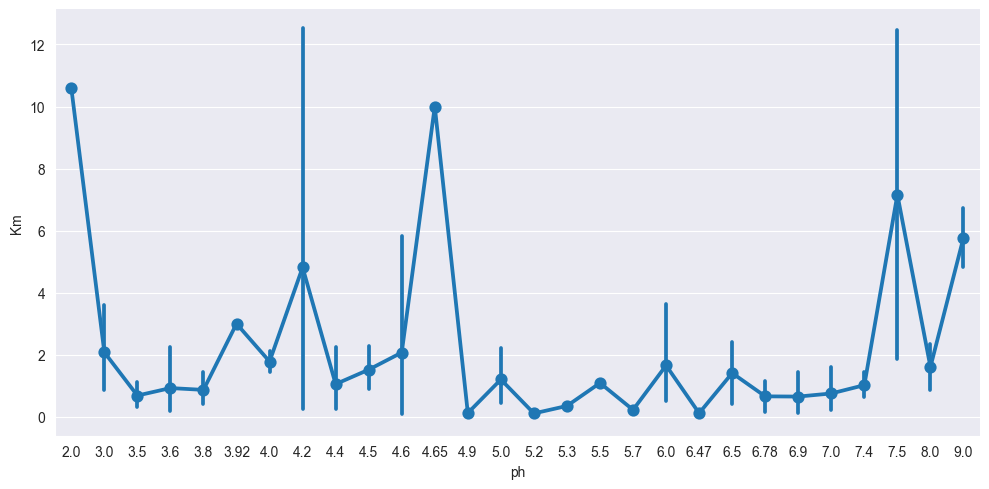

In [24]:
for i, col in enumerate(['ph']):
  plt.figure(i)
  sns.catplot(x=col, y='Km', data=df, kind='point', aspect=2,)

In [25]:
df['Complexity1']

0      226.0
1      226.0
2        0.0
3        0.0
4      226.0
       ...  
684    226.0
685    226.0
686    226.0
687    226.0
688      0.0
Name: Complexity1, Length: 689, dtype: float64

<Figure size 640x480 with 0 Axes>

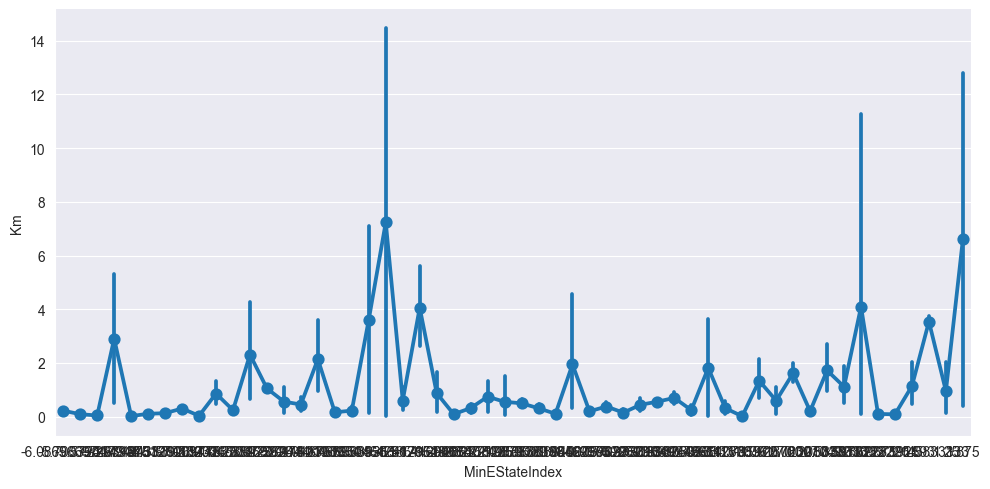

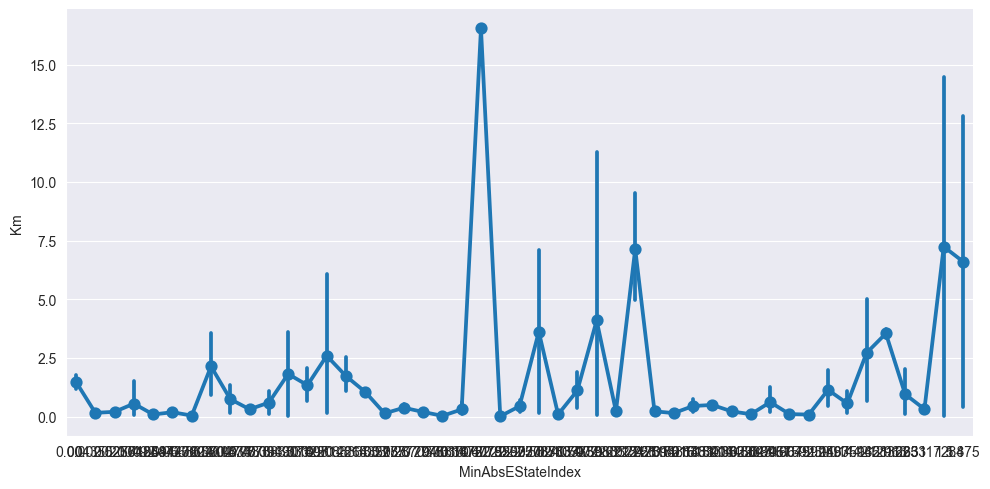

In [28]:
# Combine SibSp & Parch
for i, col in enumerate(['MinEStateIndex', 'MinAbsEStateIndex']):
  plt.figure(i)
  sns.catplot(x=col, y='Km', data=df, kind='point', aspect=2) 

In [29]:
df['MinEStateIndex_group'] = pd.qcut(df['MinEStateIndex'],10,duplicates='drop')

In [31]:
df['MinAbsEStateIndex_group'] = pd.qcut(df['MinAbsEStateIndex'],10,duplicates='drop')

<Figure size 640x480 with 0 Axes>

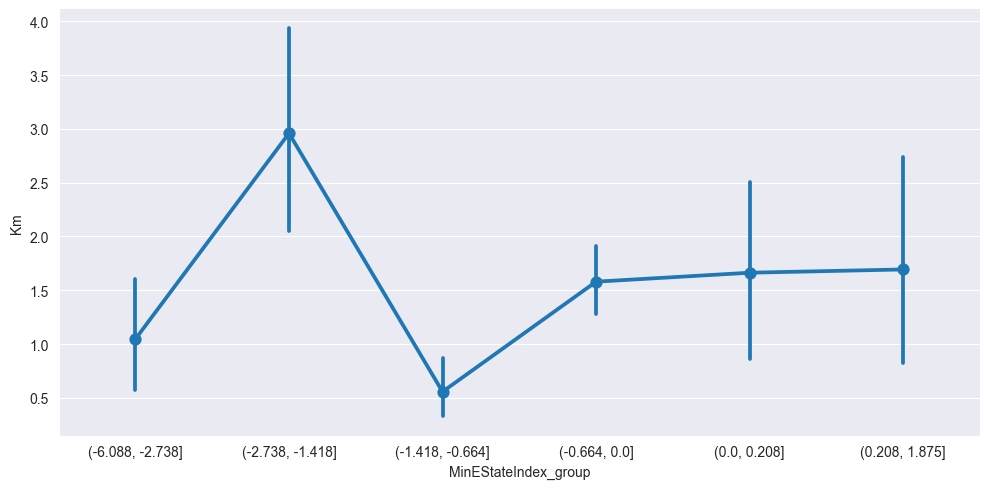

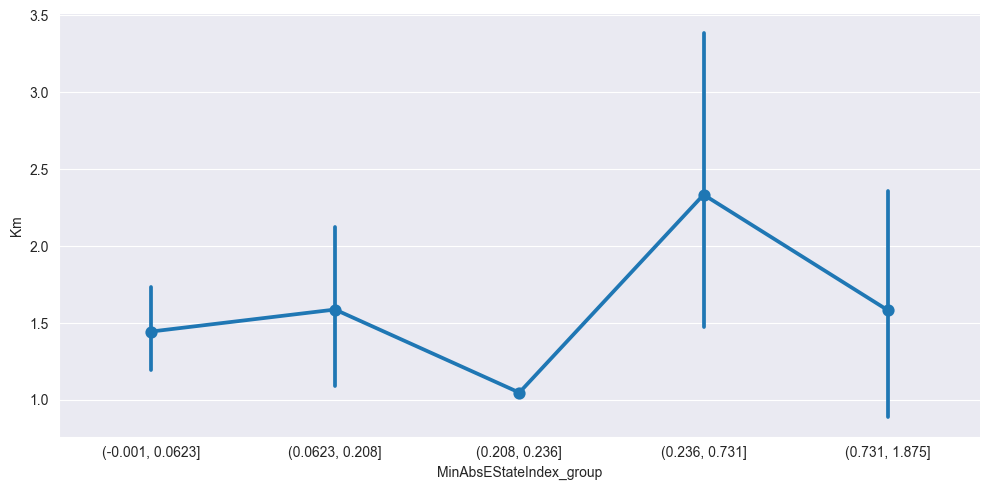

In [33]:
for i, col in enumerate(['MinEStateIndex_group', 'MinAbsEStateIndex_group']):
  plt.figure(i)
  sns.catplot(x=col, y='Km', data=df, kind='point', aspect=2) 